# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
#Build query URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

#Counters
city_counter = 1

#Set up lists to hold response info
city_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#Loop through list of cities
for city in cities:
    
    query_url = url + "&q=" + city
    
    response = requests.get(query_url).json()
    
    print(f"Processing city number {city_counter}: {city}")
    
    city_counter += 1
    
    try:
        city_list.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
    except:
        print("City not found")
        pass
    

Processing city number 1: nikolskoye
Processing city number 2: astoria
Processing city number 3: debre tabor
Processing city number 4: rikitea
Processing city number 5: butaritari
Processing city number 6: faanui
Processing city number 7: chuy
Processing city number 8: tautira
Processing city number 9: georgetown
Processing city number 10: fort-shevchenko
Processing city number 11: constitucion
Processing city number 12: jamestown
Processing city number 13: ostrovnoy
Processing city number 14: puerto ayora
Processing city number 15: sentyabrskiy
City not found
Processing city number 16: chokurdakh
Processing city number 17: salalah
Processing city number 18: witbank
Processing city number 19: albany
Processing city number 20: sangamner
Processing city number 21: ponta do sol
Processing city number 22: new norfolk
Processing city number 23: sukumo
Processing city number 24: saint-francois
Processing city number 25: busselton
Processing city number 26: deputatskiy
Processing city number 

Processing city number 217: kuusamo
Processing city number 218: olafsvik
Processing city number 219: jacmel
Processing city number 220: eureka
Processing city number 221: mingaora
Processing city number 222: camrose
Processing city number 223: longyearbyen
Processing city number 224: bemidji
Processing city number 225: kelso
Processing city number 226: keshan
City not found
Processing city number 227: poum
Processing city number 228: airai
Processing city number 229: guerrero negro
Processing city number 230: dakar
Processing city number 231: padang
Processing city number 232: mirnyy
Processing city number 233: bengkulu
Processing city number 234: manono
Processing city number 235: saskylakh
Processing city number 236: labuan
Processing city number 237: belmonte
Processing city number 238: saint-philippe
Processing city number 239: molepolole
Processing city number 240: ixtapa
Processing city number 241: paradwip
City not found
Processing city number 242: dubti
Processing city number 2

Processing city number 434: zapolyarnyy
Processing city number 435: jiangyou
Processing city number 436: douglas
Processing city number 437: kindu
Processing city number 438: vidim
Processing city number 439: karaul
City not found
Processing city number 440: cap malheureux
Processing city number 441: valmiera
Processing city number 442: saint albans
Processing city number 443: nioro
Processing city number 444: kiama
Processing city number 445: kang
Processing city number 446: kazalinsk
City not found
Processing city number 447: tual
Processing city number 448: ust-maya
Processing city number 449: bokspits
City not found
Processing city number 450: port augusta
Processing city number 451: pangnirtung
Processing city number 452: san quintin
Processing city number 453: stephenville
Processing city number 454: zuwarah
Processing city number 455: navalmoral de la mata
Processing city number 456: kushiro
Processing city number 457: khonuu
City not found
Processing city number 458: dudestii v

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
city_data = {"City": city_list,
"Cloudiness": cloudiness,
"Country": country,
"Date": date,
"Humidity": humidity,
"Lat": lat,
"Lng": lng,
"Max Temp": max_temp,
"Wind Speed": wind_speed}

city_weather_df = pd.DataFrame(city_data)
#How do i rename the index column to City_ID
#city_weather_df.rename(index = ["City_ID"])
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nikolskoye,100,RU,1587697956,80,59.70,30.79,35.60,4.47
1,Astoria,40,US,1587697956,76,46.19,-123.83,52.00,5.82
2,Debre Tabor,27,ET,1587697956,23,11.85,38.02,56.48,3.24
3,Rikitea,24,PF,1587697949,77,-23.12,-134.97,76.01,12.17
4,Butaritari,100,KI,1587697956,76,3.07,172.79,83.70,15.52


In [75]:
# Output File (CSV)
city_weather_df.to_csv("cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

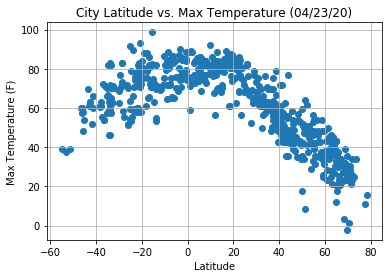

In [76]:
x_axis = city_weather_df["Lat"]
y_axis = city_weather_df["Max Temp"]

plt.scatter(x_axis, y_axis)
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('LatTemp.png')

Code is analyzing, of the random cities selected, what is the city's latitude versus max temperature.  The arch is expected because assuming a random sample of cities, as a city's latitude approaches 0/the equator the higher the max temperature.

#### Latitude vs. Humidity Plot

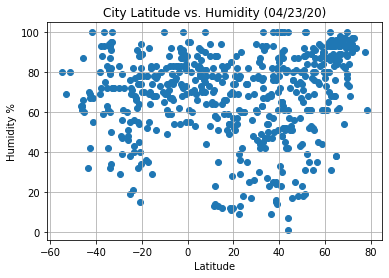

In [77]:
x_axis = city_weather_df["Lat"]
y_axis = city_weather_df["Humidity"]

plt.scatter(x_axis, y_axis)
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.savefig('LatHumidity.png')

Code is analyzing, of the random cities selected, what is the city's latitude versus humidity.  I (wrongly) assumed cities near the equator would be more humid, but dry/hot air can happen at any temp and therefore any city.

#### Latitude vs. Cloudiness Plot

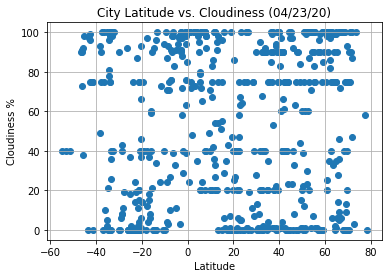

In [78]:
x_axis = city_weather_df["Lat"]
y_axis = city_weather_df["Cloudiness"]

plt.scatter(x_axis, y_axis)
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()
plt.savefig('LatCloudiness.png')

Code is analyzing, of the random cities selected, what is the city's latitude versus cloudiness.  No clear relationship.

#### Latitude vs. Wind Speed Plot

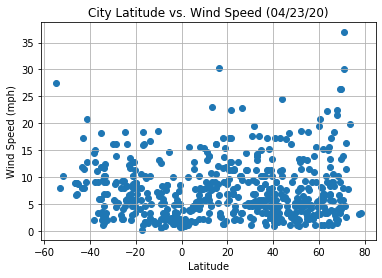

In [79]:
x_axis = city_weather_df["Lat"]
y_axis = city_weather_df["Wind Speed"]

plt.scatter(x_axis, y_axis)
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('LatWindSpeed.png')

Code is analyzing, of the random cities selected, what is the city's latitude versus wind speed. No clear relationship.

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

In [83]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_weather_df.loc[(city_weather_df["Lat"]>=0)]
northern_df.head()

southern_df = city_weather_df.loc[(city_weather_df["Lat"]<0)]
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
3,Rikitea,24,PF,1587697949,77,-23.12,-134.97,76.01,12.17
5,Faanui,8,PF,1587697957,70,-16.48,-151.75,80.74,16.15
6,Chui,36,UY,1587697957,91,-33.70,-53.46,65.21,11.70
7,Tautira,12,PF,1587697957,52,-17.73,-149.15,87.80,5.82
10,Constitución,100,CL,1587697958,83,-35.33,-72.42,57.42,18.14


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

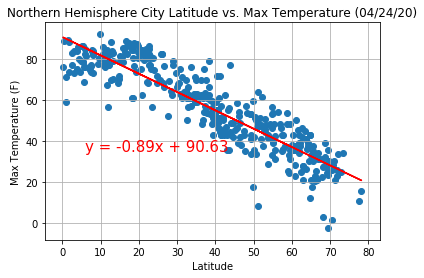

In [105]:
x_axis = northern_df["Lat"]
y_axis = northern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(6,35),fontsize=15,color="red")

plt.scatter(x_axis, y_axis)
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

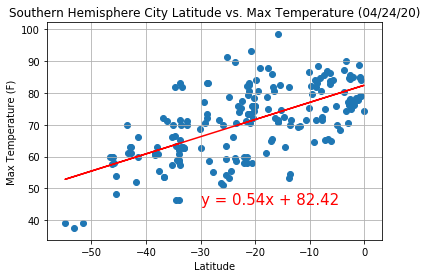

In [106]:
x_axis = southern_df["Lat"]
y_axis = southern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")

plt.scatter(x_axis, y_axis)
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

No surprise, the closer a city's latitude is to 0/the equator the higher the max temperature.  It appears my random sample of cities has more cities within the Northern Hemisphere versus Southern Hemisphere, but the latitude/temperature relationship is clear with the data selected and plotted.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

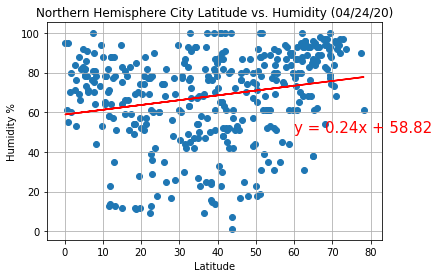

In [109]:
x_axis = northern_df["Lat"]
y_axis = northern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(60,50),fontsize=15,color="red")

plt.scatter(x_axis, y_axis)
plt.title("Northern Hemisphere City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

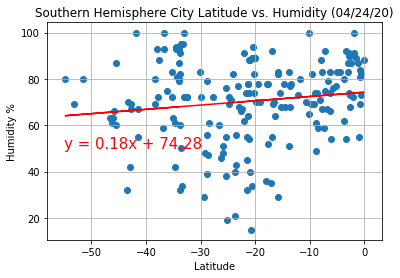

In [110]:
x_axis = southern_df["Lat"]
y_axis = southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")

plt.scatter(x_axis, y_axis)
plt.title("Southern Hemisphere City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()

Humidity and latitude do not have a strong relationship in either hemisphere, but as cities move north, humidity increases, albeit slightly.  In the Northern Hemisphere, as cities move north away from the equator, humidity increases whereas, in the Southern Hemisphere, as cities move north towards the equator, humidity increases as well.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

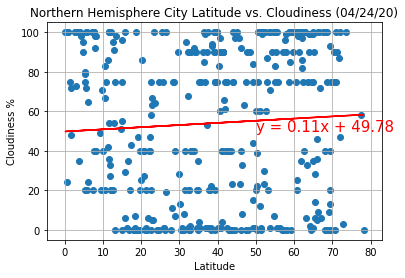

In [111]:
x_axis = northern_df["Lat"]
y_axis = northern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")

plt.scatter(x_axis, y_axis)
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

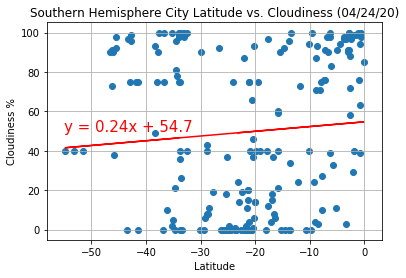

In [112]:
x_axis = southern_df["Lat"]
y_axis = southern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")

plt.scatter(x_axis, y_axis)
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()

Cloudiness and latitude are even less related than humidity and latitude.  Based on the scatter plot, cloudiness levels are not impacted by latitude.  Based on the linear regression, cloudiness increases as cities move north, but the relationship, especially in the Northern Hemisphere, is weak.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

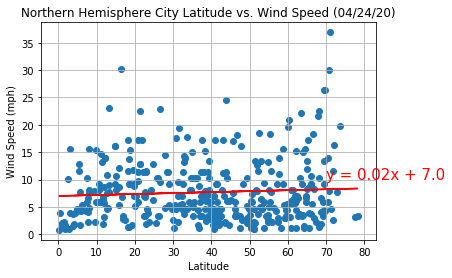

In [115]:
x_axis = northern_df["Lat"]
y_axis = northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(70,10),fontsize=15,color="red")

plt.scatter(x_axis, y_axis)
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

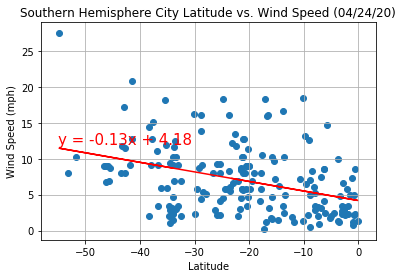

In [118]:
x_axis = southern_df["Lat"]
y_axis = southern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-55,12),fontsize=15,color="red")

plt.scatter(x_axis, y_axis)
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

Wind speed and latitude have a stronger relationship in the Southern Hemisphere versus Northern.  In both hemispheres, as cities move away from the equator/closer to the poles, wind speed increases slightly.  This is more evident in the Southern Hemisphere's linear regression.

Concluding observable trends:
1) Based on the random cities selected, humidity, cloudiness, and wind speed are not closely related to latitute.
2) Graphically, one can observe that max temperatures increase as latitudes move close to 0/the equator.
3) Based on the random cities selected, more datapoints were within the Northern Hemisphere.  It is possible, if more Southern Hemisphere cities were selected, we could find stronger relationships in the variables.